# Variáveis Aleatórias Discretas

Variável aleatória é um conceito utilizado na teoria das probabilidades e estatística para descrever um tipo de função matemática que relaciona eventos aleatórios a valores numéricos. Ou seja, é uma função que atribui um número a cada possível resultado de um experimento aleatório.

## Simulação de Monte Carlo

 A Simulação de Monte Carlo é uma técnica matemática usada para estimar os possíveis resultados de um evento incerto. Essa simulação cria um modelo de resultados possíveis aproveitando uma distribuição de probabilidade, como uma distribuição uniforme ou normal, para qualquer variável que tenha incerteza inerente. Em seguida, ela recalcula os resultados repetidamente, cada vez usando um conjunto diferente de números aleatórios entre os valores mínimo e máximo. 

## Teoria da Probabilidade - Variáveis Aleatórias Discretas

#### Distribuição uniforme

Todas os valores possíveis para uma variável aleatória $X$ têm a mesma probabilidade. Se uma variável $X$ tem distribuição uniforme discreta, escrevemos assim $X \sim U\{x_1,...,x_n\}$.

Logo se $X \sim U\{x_1,...,x_n\}$ então a função massa de probabilidade de X é dada por

\begin{align}
  \mathbb{P}(X=x)=\frac{1}{n}\mathbb{I}_{\{x_1,...,x_n\}}(x)
\end{align}

Sendo que $\mathbb{I}$ é a função indicadora, ou seja,

\begin{align}
  \mathbb{I}_A(x)=\left\{\begin{matrix}
  1, \text{ se } x \in A\\ 
  0, \text{ se } x \notin A
  \end{matrix}\right.
\end{align}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import beta
import seaborn as sns

In [4]:
def uniforme(x, lista):
    n = len(lista)
    if x in lista:
        return 1/n
    else:
        return 0

In [16]:
lista = [1, 2, 3, 4, 5, 6]
prob = []

for i in range (7):
    prob.append([i, uniforme(i, lista)])

d = np.array(prob)
d = pd.DataFrame(d)
d.head(6)

,0,1
0,0.0,0.000000
1,1.0,0.166667
2,2.0,0.166667
3,3.0,0.166667
4,4.0,0.166667
5,5.0,0.166667


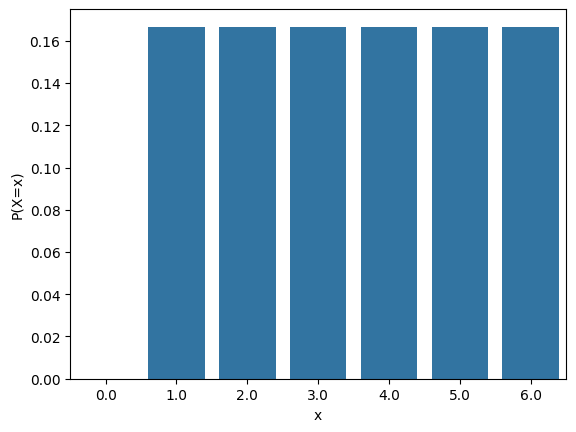

In [17]:
plot=sns.barplot(x=0,y=1,data=d)
plot.set(ylabel="P(X=x)")
plot.set(xlabel="x")
plt.show()

#### Distribuição de Bernoulli 


A distribuição de Bernoulli é usada para modelar situações em que há duas opções, fracasso e sucesso, sendo que o fracasso é denotado por 0 e o sucesso é denotado por 1. Dizemos que a probabilidade de sucesso é $\mathbb{P}(X=1)=p$ e que a probabilidade de fracasso é $\mathbb{P}(X=0)=1-p$. Suponha que a probabilidade de se ganhar na loteria em um jogo é $1/1000000=0,0000001$, então podemos definir $p=0,0000001$ como a probabilidade de sucesso. Se a variável $X$ tem distribuição de Bernoulli com parâmetro $p$, escrevemos $X \sim \text{Ber}(p)$, sendo que uma maneira enxuta de expressar sua função massa de probabilidade é

\begin{align}
  \mathbb{P}(X=x)=p^x(1-p)^{1-x}~\mathbb{I}_{\{0,1\}}(x)
\end{align}



In [19]:
p = 0.70
amostra = np.random.binomial(n=1, p=p, size=1000)

print("Média: ", np.mean(amostra))
print("Variância: ", np.var(amostra))

Média:  0.702
Variância:  0.20919600000000002


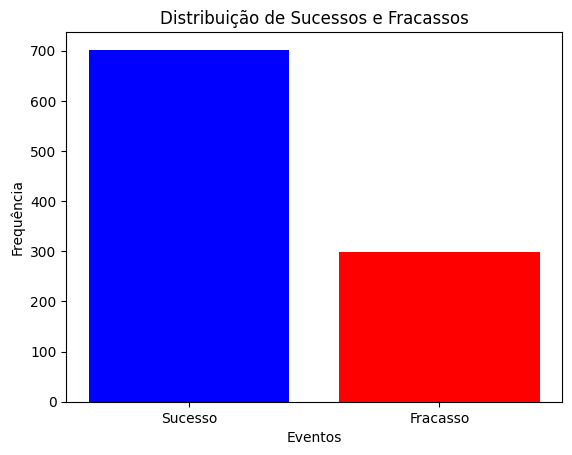

In [32]:
sucessos = np.sum(amostra)
fracassos = len(amostra) - sucessos

labels = ['Sucesso', 'Fracasso']
counts = [sucessos, fracassos]

plt.bar(labels, counts, color=['blue', 'red'])
plt.title('Distribuição de Sucessos e Fracassos')
plt.ylabel('Frequência')
plt.xlabel('Eventos')
plt.show()

#### Distribuição Binomial

Essa distribuição é dada pela soma de $n$ variáveis independentes com distribuição de Bernoulli. Ao invés de eu me perguntar qual a probabilidade de ganhar na loteria em uma tentativa, me pergunto qual a probabilidade de ganhar $x$ vezes em $n$ tentativas indepependentes (ganhar ou perder em uma tentativa não influencia em nada na probabilidade de ganhar ou perder em outra tentativa). Se uma variável $X$ tem distribuição binomial com parâmetros $n$ (número de tantativas) e $p$ (probabilidade de sucesso em uma tentativa), escrevemos $X \sim \text{Bin}(n,p)$. Usamos a seguinte fórmula para o cálculo:

\begin{align}
	\mathbb{P}(X=x)&=\binom{n }{k}p^x(1-p)^{n-x}~\mathbb{I}_{\{0,...n\}}(x)\\
  &=\frac{n!}{x!(n-x)!}p^x(1-p)^{n-x}~\mathbb{I}_{\{0,...n\}}(x)
\end{align}


In [25]:
import math

def binomial(x, n, p):
    fatorial = (math.factorial(n)/(math.factorial(x)*math.factorial(n-x)))
    return fatorial*(p)**x*(1-p)**(n-x)

In [26]:
prob = []
n = 20
p = 0.15

for i in range(n+1):
    prob.append([i,binomial(i,n,p)])
  
d=np.array(prob)
d=pd.DataFrame(d)

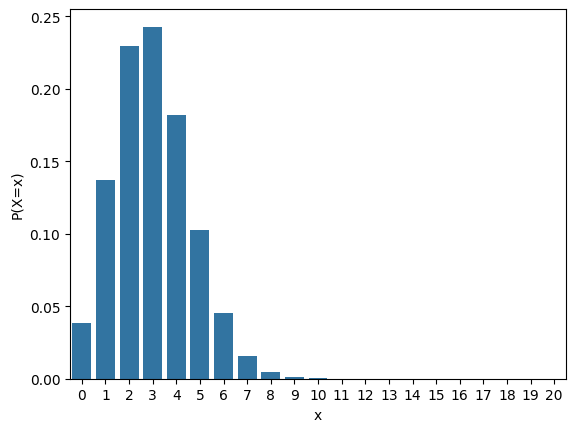

In [31]:
from matplotlib.ticker import FuncFormatter

plot=sns.barplot(x=0,y=1,data=d)
plot.set(ylabel="P(X=x)")
plot.set(xlabel="x")
plot.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.show()

#### Distribuição de Poisson

A distribuição de Poisson é uma distribuição de probabilidade discreta usada para modelar a probabilidade de um certo número de eventos ocorrerem em um intervalo de tempo ou espaço fixo, quando a taxa média de ocorrência é conhecida e os eventos ocorrem de forma aleatória e independente ao longo do intervalo. Essa distribuição é frequentemente utilizada para modelar o número de ocorrências de eventos raros em um intervalo de tempo ou espaço

[2 2 5 2 1 3 2 3 1 4]


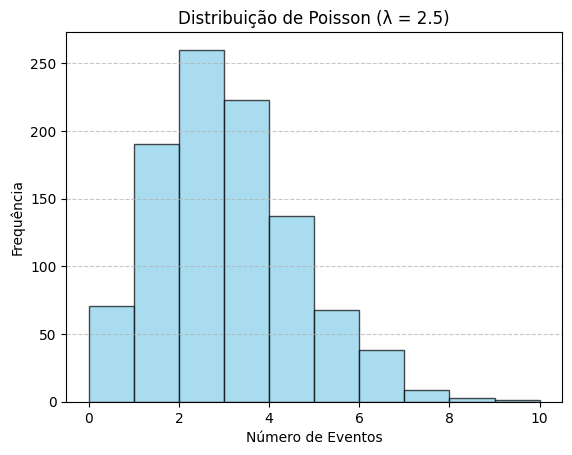

In [30]:
def dist_poisson(t):
    amostra_poisson = np.random.poisson(t, size=1000)
    print(amostra_poisson[:10])
    plt.hist(amostra_poisson, bins=range(0, max(amostra_poisson) + 2), color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribuição de Poisson (λ = {t})')
    plt.xlabel('Número de Eventos')
    plt.ylabel('Frequência')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


dist_poisson(2.5)